**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are some problems that need to be fixed before the project is accepted. Let me know if you have questions!

# Introduction

Zyfra is a company in the mining sector that works to improve efficiency and safety for the mining industry.

We are tasked to predict the amount of gold recovered from gold ore. The data provided is on the extraction and the two-stage purification in a process called Floatation, Purificationm, and Recovery.

**Objective:**
In order to predict the amount of gold recovered from ore, we need to predict two values:
* rougher concentrate recovery [rougher.output.recovery]
* final concentrate recovery [final.output.recovery]
* calculate the final sMAPE value


**Data description**

Technological process
* Rougher feed — raw material
* Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
    * Xanthate — promoter or flotation activator;
    * Sulphate — sodium sulphide for this particular process;
    * Depressant — sodium silicate.
* Rougher process — flotation
* Rougher tails — product residues
* Float banks — flotation unit
* Cleaner process — purification
* Rougher Au — rougher gold concentrate
* Final Au — final gold concentrate

Parameters of stages
* air amount — volume of air
* fluid levels
* feed size — feed particle size
* feed rate

## Prepare the Data

To begin, we will first perform the following on the data:

- Load the necessary libraries
- Import the file into Dataframes
- Display the data
- View the info
- Describe the data
- Check for nulls
- Check the unique values
- Check for duplicates
- Fix data types


* 1.2 Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.
* 1.3 Analyze the features not available in the test set. What are these parameters? What is their type?
* 1.4. Perform data preprocessing.

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, r2_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import random
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer

### Load Dataframes

In [2]:
# Load the data into dataframes
try:
    gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

except FileNotFoundError:
    gold_train = pd.read_csv('../datasets/gold_recovery_train.csv')
    gold_test = pd.read_csv('../datasets/gold_recovery_test.csv')
    gold_full = pd.read_csv('../datasets/gold_recovery_full.csv')

### Display the Data

In [3]:
# Display dataframes
display(gold_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
display(gold_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [5]:
display(gold_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Data Info

In [6]:
# View the info
print(gold_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
print(gold_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
print(gold_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


### Describe the Data

In [9]:
# Describe the data
print(gold_train.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.939185                    4

In [10]:
print(gold_test.describe())

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5554.000000                       5572.000000   
mean                      170.515243                          8.482873   
std                        49.608602                          3.353105   
min                         0.000103                          0.000031   
25%                       143.340022                          6.411500   
50%                       176.103893                          8.023252   
75%                       207.240761                         10.017725   
max                       274.409626                         40.024582   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5856.000000                     5690.000000   
mean                          7.264651                        1.321420   
std                           0.611526                        0.693246   
min                           5.65000

In [11]:
print(gold_full.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 22627.000000                 22629.000000   
mean                      4.781559                     9.095308   
std                       2.030128                     3.230797   
min                       0.000000                     0.000000   
25%                       4.018525                     8.750171   
50%                       4.953729                     9.914519   
75%                       5.862593                    10.929839   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  22331.000000                 22630.000000   
mean                       8.640317                    40.001172   
std                        3.785035                    13.398062   
min                        0.000000                     0.000000   
25%                        7.116799                    4

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

### Nulls

In [12]:
# Check for nulls
print(gold_train.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


In [13]:
print(gold_test.isna().sum())

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [14]:
print(gold_full.isna().sum())

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


We will need to choose what to do with the null values.

- Fill with mean
- Fill with median
- Drop null rows

In [15]:
gold_train_dropna = gold_train.dropna()  # [~gold_train.isna()].reset_index(drop=True)
gold_train_dropna.info()  # 16860 before, 11017 after

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-null  float64


In [16]:
11017/16860

0.6534400948991697

We just checked how much of the training set was dropped if we only used rows without any nulls. Seeing that it removed almost 35% of the data, we will choose not to drop the rows. Later we will choose to fill the null values in with the mean or median.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

### Duplicates

In [17]:
# Check for duplicates
print(gold_train[gold_train.duplicated()])

Empty DataFrame
Columns: [date, final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_le

In [18]:
print(gold_test[gold_test.duplicated()])

Empty DataFrame
Columns: [date, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatba

In [19]:
print(gold_full[gold_full.duplicated()])

Empty DataFrame
Columns: [date, final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_le

There are no duplicates in any of the three dataframes.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good!

</div>

### Fix data types

In [20]:
# Fix data types
gold_train['date'] = pd.to_datetime(gold_train['date'], format='%Y-%m-%d')
print(gold_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

In [21]:
gold_test['date'] = pd.to_datetime(gold_test['date'], format='%Y-%m-%d %H:%M:%S')
print(gold_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

In [22]:
# display(gold_test)
gold_test['date'].nunique()

5856

In [23]:
gold_full['date'] = pd.to_datetime(gold_full['date'], format='%Y-%m-%d %H:%M:%S')
print(gold_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

In [24]:
# gold_full[(gold_full['date'] > '2016-09-01') & (gold_full['date'] < '2018-01-01')]

In [25]:
gold_full['date'].nunique()

22716

In [26]:
# Find matching rows in test and full dataframes
full_test_index = gold_full[gold_full['date'].isin(gold_test['date'])].index
print(full_test_index)

Int64Index([ 5521,  5522,  5523,  5524,  5525,  5526,  5527,  5528,  5529,
             5530,
            ...
            17199, 17200, 17201, 17202, 17203, 17204, 17205, 17206, 17207,
            17208],
           dtype='int64', length=5856)


In [27]:
gf = gold_full.loc[full_test_index]
print(gf[gf['final.output.recovery'].isna()])

                     date  final.output.concentrate_ag  \
5552  2016-09-02 07:59:59                     0.000000   
5553  2016-09-02 08:59:59                     0.000000   
5554  2016-09-02 09:59:59                     0.000000   
5690  2016-09-08 01:59:59                     4.286447   
5691  2016-09-08 02:59:59                     4.334779   
...                   ...                          ...   
17072 2017-12-26 07:59:59                     7.749967   
17074 2017-12-26 09:59:59                     0.351004   
17101 2017-12-27 12:59:59                     0.003432   
17102 2017-12-27 13:59:59                     0.000000   
17103 2017-12-27 14:59:59                     0.000000   

       final.output.concentrate_pb  final.output.concentrate_sol  \
5552                      0.000000                      0.000000   
5553                      0.000000                      0.000000   
5554                      0.000000                      0.000000   
5690                      7.308

In [28]:
gold_test_merged = gold_test.merge(gold_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')
print(gold_test_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

In [29]:
print(gold_test_merged.isna().sum())

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


Created a new test dataframe that combined the two target columns from the full set.

### MAE Calculation

In [30]:
#Create function to calculate Recovery.
def recovery(df, C, F, T):
    rec = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return rec

#Carry out calculations for rows which don't have NaN in rougher.output.recovery.
vals_pred = recovery(gold_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
vals_act = gold_train['rougher.output.recovery'].dropna().to_list()

print(f"Mean Absolute Error: {mean_absolute_error(vals_act, vals_pred)}")

Mean Absolute Error: 9.303415616264301e-15


<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

In [31]:
#vals_pred_final = recovery(gold_train_na, 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au')
#vals_act_final = gold_train_na['final.output.recovery'].to_list()

#print(f"Mean Absolute Error: {mean_absolute_error(vals_act_final, vals_pred_final)}")

Analyze the features not available in the test set. What are these parameters? What is their type?

The following columns appear in the training set, but not in the test set:
- 9 columns named as "final.output.[concentrate or tail with element]"
- 8 columns named as "primary_cleaner.output.[concentrate or tail with element]"
- 4 columns named as "rougher.calculation.[parameter_name]"
- 9 columns named as "rougher.output.[concentrate or tail with element]"
- 4 columns named as "secondary_cleaner.output.[tail with element]"

These 34 missing features are all either outputs or calculation types.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right! The main point here is that all these are either outputs of the process or calculations based on outputs, and thus using them as features in our models would cause data leakage

</div>

In [32]:
not_avail = []
cols = gold_train.columns.tolist()
#print(cols)
for i in cols:
    if ('output' in i) or ('calculation' in i):
        not_avail.append(i)
print(not_avail)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

### Perform data preprocessing

We saw from above that the means and medians of each column were close together. For our purposes, we will use the mean of each column to fill the null values. But first, we will drop the rows of the missing values for the target columns, final.output.recovery and rougher.output.recovery 

In [33]:
# gold_train.iloc[:, 1:]

In [34]:
final_na = gold_train[gold_train['final.output.recovery'].isna()].index
print(final_na)

Int64Index([   49,    99,   100,   101,   102,   103,   104,   105,   106,
              107,
            ...
            16503, 16539, 16665, 16666, 16693, 16800, 16801, 16802, 16803,
            16804],
           dtype='int64', length=1521)


In [35]:
gold_train.drop(final_na, inplace=True)
#gold_train.drop(rougher_na)
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15339 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                15339 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         15338 non-null  float64       
 2   final.output.concentrate_pb                         15338 non-null  float64       
 3   final.output.concentrate_sol                        15072 non-null  float64       
 4   final.output.concentrate_au                         15339 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                15339 non-null  float64       
 7   final.output.tail_pb                                15239 non-null  float64       
 8   final.

In [36]:
rougher_na = gold_train[gold_train['rougher.output.recovery'].isna()].index
print(rougher_na)

Int64Index([   53,   130,   131,   132,   133,   134,   135,   138,   357,
              358,
            ...
            16612, 16647, 16653, 16654, 16674, 16697, 16698, 16699, 16700,
            16701],
           dtype='int64', length=1190)


In [37]:
gold_train.drop(rougher_na, inplace=True)
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [38]:
# Preprocess the training set
gold_train_na = gold_train.drop(['date'], axis=1)
gold_train_na.fillna(gold_train_na.mean(), inplace=True)
print(gold_train_na.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


In [39]:
print(gold_train_na.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14149.000000                 14149.000000   
mean                      5.142034                    10.132960   
std                       1.369537                     1.654872   
min                       0.000000                     0.000000   
25%                       4.211660                     9.297528   
50%                       4.994697                    10.297013   
75%                       5.859495                    11.170578   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  14149.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.769630                     4.905261   
min                        0.000000                     0.000000   
25%                        7.514802                    4

In [40]:
print(gold_train_na.isna().sum())

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64


Preprocess the test set by first matching the rows of the test set with the columns final.output.recovery and rougher.output.recovery in the full set. Then drop the nulls in these columns and finally fill the nulls in the other columns with the mean.

In [41]:
fin_na = gold_test_merged[gold_test_merged['final.output.recovery'].isna()].index
gold_test_merged.drop(fin_na, inplace=True)
rough_na = gold_test_merged[gold_test_merged['rougher.output.recovery'].isna()].index
gold_test_merged.drop(rough_na, inplace=True)


In [42]:
gold_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [43]:
gold_test_na = gold_test_merged.drop(['date'], axis=1)


In [44]:
gold_test_na.fillna(gold_test_na.mean(), inplace=True)
print(gold_test_na.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [45]:
print(gold_test_na.describe())

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5290.000000                       5290.000000   
mean                      174.839652                          8.683596   
std                        43.010806                          3.070598   
min                         2.566156                          0.003839   
25%                       147.133336                          6.489590   
50%                       177.821716                          8.052685   
75%                       208.112236                         10.027485   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5290.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643231   
min                           5.65000

In [46]:
print(gold_test_na.isna().sum())

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [47]:
#gold_full.info()
#gold_full[['final.output.recovery', 'rougher.output.recovery']]

In [48]:
# Preprocess the full set
#fin_na = gold_full[gold_full['final.output.recovery'].isna()].index
#gold_full.drop(fin_na, inplace=True)
#rough_na = gold_full[gold_full['rougher.output.recovery'].isna()].index
#gold_full.drop(rough_na, inplace=True)


In [49]:
#gold_full_na = gold_full.drop(['date'], axis=1)
#gold_full_na.fillna(gold_full_na.mean(), inplace=True)
#print(gold_full_na.info())

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

It is important to drop missing values in target columns before filling the other columns, otherwise we won't be able to accurately estimate the model's performance

</div>

<div class="alert alert-info">
    Dropped the missing values for the target columns
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

## Analyze the data
* 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
* 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.
* 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

<!--
- 2.1 you should make hostograms of each metal concentration at each stage and note how each metal changes across stages. 
- 2.2 you dont need to do a t-test, again it can be histograms of feed size for the training and testing set separately and then noting the differences and if you think they are significant. then lastly for 
- 2.3, sum up the metal concentrations (sum gold, silver, lead) for each stage and make a histogram of each of these stages sums, then if you see any values for the sum of these that are obvious outliers, go ahead and remove them -->

### Purification Concentrations of Metals 

Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

#### Au = Gold

<!--# Au
print(gold_train_na['primary_cleaner.output.concentrate_au'].mean())
print(gold_train_na['primary_cleaner.output.concentrate_au'].median())
print(gold_train_na['primary_cleaner.output.concentrate_au'].isna().sum())

print(gold_train_na['final.output.concentrate_au'].mean())
print(gold_train_na['final.output.concentrate_au'].median())
print(gold_train_na['final.output.concentrate_au'].isna().sum())-->

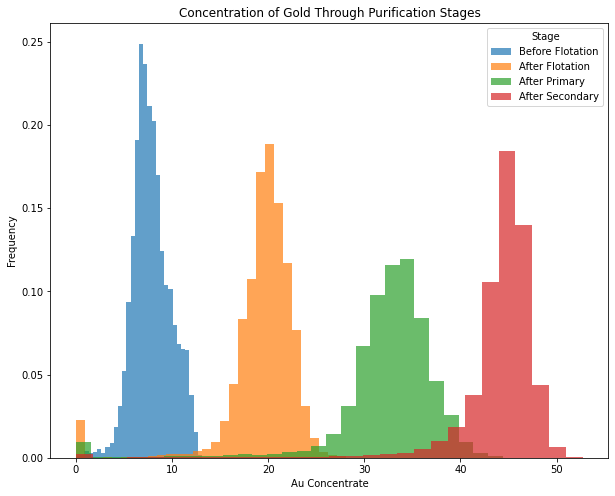

In [50]:
gold_train_na['rougher.input.feed_au'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['rougher.output.concentrate_au'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['primary_cleaner.output.concentrate_au'].plot(
    kind='hist',
    bins=30,
    title='Concentration of Gold Through Purification Stages',
    figsize=[10,8],
    alpha=0.7, 
    density=True
)
plt.legend(['Before Flotation', 'After Flotation', 'After Primary', 'After Secondary'], title='Stage')
plt.xlabel('Au Concentrate')
gold_train_na['final.output.concentrate_au'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
plt.show()

The overall concentration of gold from the flotation input stage through the secondary cleaner process goes up with a large portion of the bell curve moving up by about 10 from each stage to the next.

In [51]:
#final.output.concentrate_au
#final.output.concentrate_ag
#final.output.concentrate_pb

#### Ag = Silver

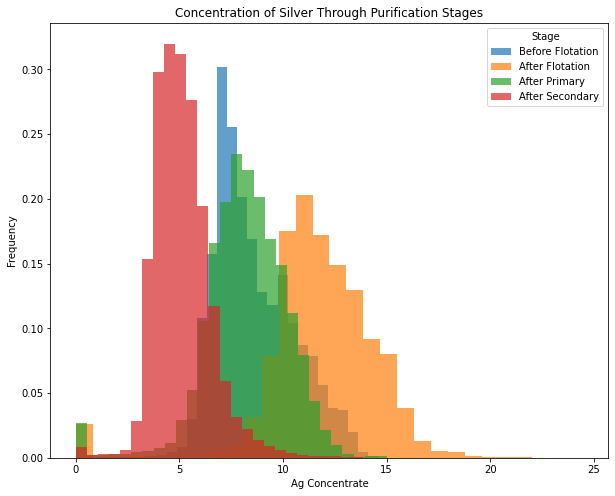

In [52]:
gold_train_na['rougher.input.feed_ag'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['rougher.output.concentrate_ag'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['primary_cleaner.output.concentrate_ag'].plot(
    kind='hist',
    bins=30,
    title='Concentration of Silver Through Purification Stages',
    figsize=[10,8],
    alpha=0.7, 
    density=True
)
plt.legend(['Before Flotation', 'After Flotation', 'After Primary', 'After Secondary'], title='Stage')
plt.xlabel('Ag Concentrate')
gold_train_na['final.output.concentrate_ag'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
plt.show()

From the input stage to the rougher output stage, the silver concentration initially goes up. After the primary stage, though, the overall concentrations of silver decrease from the primary cleaner process and the secondary cleaner stages.

#### Pb = Lead

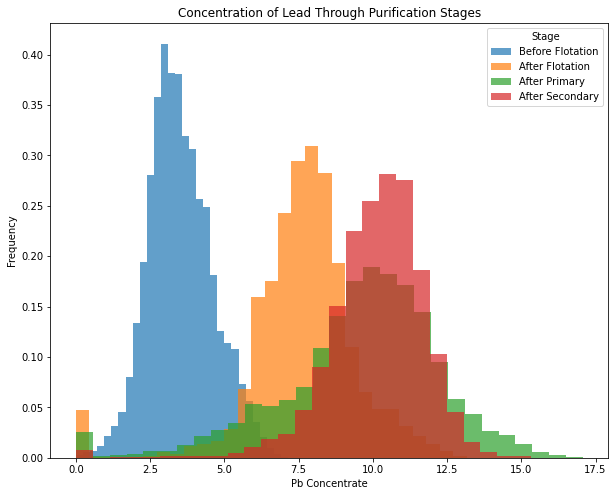

In [53]:
gold_train_na['rougher.input.feed_pb'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['rougher.output.concentrate_pb'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
gold_train_na['primary_cleaner.output.concentrate_pb'].plot(
    kind='hist',
    bins=30,
    title='Concentration of Lead Through Purification Stages',
    figsize=[10,8],
    alpha=0.7, 
    density=True
)
plt.legend(['Before Flotation', 'After Flotation', 'After Primary', 'After Secondary'], title='Stage')
plt.xlabel('Pb Concentrate')
gold_train_na['final.output.concentrate_pb'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
plt.show()

The distribution of concentration of lead increases from the input stage until the output of the primary cleaner process. From here to the secondary cleaner process, the concentration stays the same, the main difference being the bell curve gets more concentrated about the mean.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please add the first two stages: `rougher.input.feed.au`, etc and `rougher.output.concentrate_au`, etc.

</div>

<div class="alert alert-info">
  Added rougher.input.feed_ and rougher.output.concentrate_ stages to the histograms and updated summaries beneath each plot.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome!

</div>

### Feed Particle Size

Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

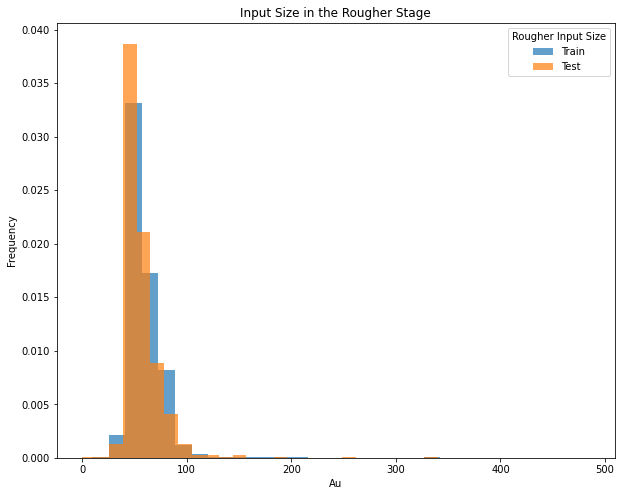

In [54]:
# Train vs Test Rougher Input Size
gold_train_na['rougher.input.feed_size'].plot(
    kind='hist',
    bins=30,
    title='Input Size in the Rougher Stage',
    figsize=[10,8],
    alpha=0.7, 
    density=True
)
plt.legend(['Train', 'Test'], title='Rougher Input Size')
plt.xlabel('Au')
gold_test_na['rougher.input.feed_size'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
plt.show()


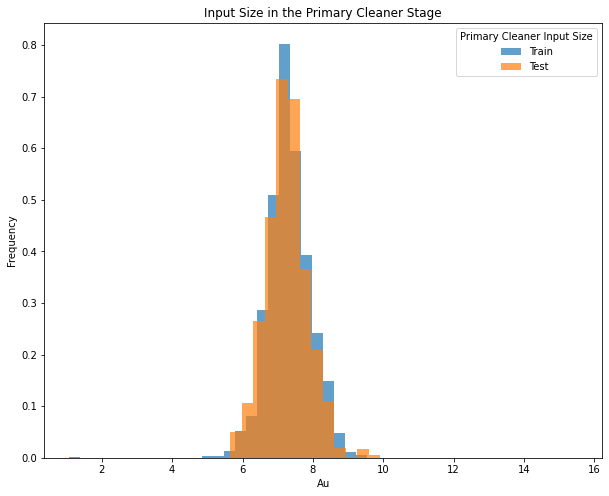

In [55]:
# Train vs Test Input Size
gold_train_na['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    bins=30,
    title='Input Size in the Primary Cleaner Stage',
    figsize=[10,8],
    alpha=0.7, 
    density=True
)
plt.legend(['Train', 'Test'], title='Primary Cleaner Input Size')
plt.xlabel('Au')
gold_test_na['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    bins=30,
    alpha=0.7, 
    density=True
)
plt.show()

In [56]:
# Histogram of of games by genre
# color='genre', barmode="overlay", , hover_data=['type']) # color='make'
#pt_histo = px.histogram(gold_train['primary_cleaner.input.feed_size'], x='primary_cleaner.input.feed_size', nbins=20, histnorm='probability') 
#pt_histo.update_layout(
#    title_text='Input size', # title of plot
#    xaxis_title_text='Size', # xaxis label
#    yaxis_title_text='Frequency', # yaxis label
#)
#pt_histo2 = px.histogram(gold_test['primary_cleaner.input.feed_size'], x='primary_cleaner.input.feed_size', nbins=20, histnorm='probability')
#pt_histo.show()
#pt_histo2.show()

Both the previous histograms show the input size at the rougher and primary cleaner stages. By overlaying the normalized graphs on each other, we see that the distributions are similar enough that we can use the test set for modeling.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very well! Feed size distributions were compared successfully

</div>

### Total Concentrations

Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [70]:
# 2.3 sum up the metal concentrations (sum gold, silver, lead) 
# for each stage and make a histogram of each of these stages sums, 
# then if you see any values for the sum of these that are obvious outliers, 
# go ahead and remove them
sets = []
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_'] # 
metals = ['au', 'ag', 'pb']
for i in stages:
    rows = []
    for j in metals:
        rows.append(i+j)
    sets.append(rows)

#print(sets[0])        
#gold_train['concentrations'] = gold_train[cols].sum(axis=1)
concentrations = [[],[],[],[]]
concentrations[0].append(gold_train_na[sets[0]].sum(axis=1))  # rougher.input.feed
concentrations[1].append(gold_train_na[sets[1]].sum(axis=1))  # rougher.output.concentrate
concentrations[2].append(gold_train_na[sets[2]].sum(axis=1))  # primary_cleaner.output.concentrate
concentrations[3].append(gold_train_na[sets[3]].sum(axis=1))  # final.output.concentrate
#concentrations = gold_train_na[cols].sum(axis=1)

print(concentrations)


[[0        14.871440
1        14.905729
2        14.638299
3        14.199305
4        13.511497
           ...    
16855    16.045275
16856    15.104931
16857    14.515579
16858    14.313448
16859    14.399936
Length: 14149, dtype: float64], [0        38.395653
1        38.945647
2        38.649756
3        38.411473
4        38.867359
           ...    
16855    40.712449
16856    40.755632
16857    32.589863
16858    40.148948
16859    40.465768
Length: 14149, dtype: float64], [0        53.111627
1        53.174338
2        52.927464
3        43.979185
4        52.121146
           ...    
16855    51.945355
16856    52.161648
16857    51.619196
16858    50.273714
16859    49.544487
Length: 14149, dtype: float64], [0        58.137072
1        58.699942
2        58.927421
3        58.714815
4        59.065251
           ...    
16855    61.295107
16856    61.412113
16857    61.340054
16858    61.401016
16859    61.635645
Length: 14149, dtype: float64]]


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Note that you need to separately calculate total concentration at each stage (e.g. for initial concentrations `rougher.input.feed_au + rougher.input.feed_ag + rougher.input.feed_pb`). Also don't forget about `primary_cleaner.output.concentrate_*`

</div>

<div class="alert alert-info">
  Calculated concentrations seperately and added primary cleaner stage. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Well done!

</div>

In [58]:
#print(gold_train.loc[0, cols].sum())
#print(gold_train.loc[16859, cols].sum())

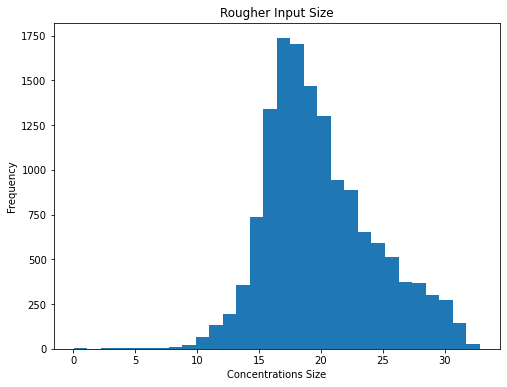

In [59]:
concentrations[0][0].plot(
    kind='hist',
    bins=30,
    title='Rougher Input Size',
    figsize=[8,6] 
)
plt.xlabel('Concentrations Size')
plt.show()

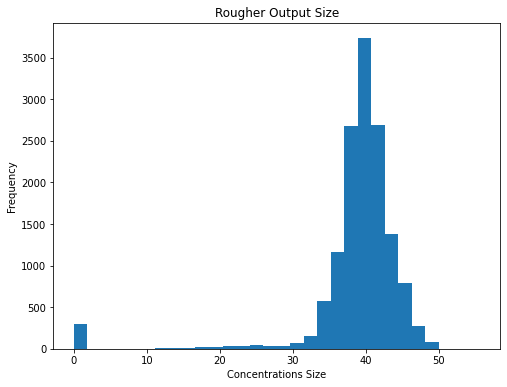

In [60]:
concentrations[1][0].plot(
    kind='hist',
    bins=30,
    title='Rougher Output Size',
    figsize=[8,6] 
)
plt.xlabel('Concentrations Size')
plt.show()

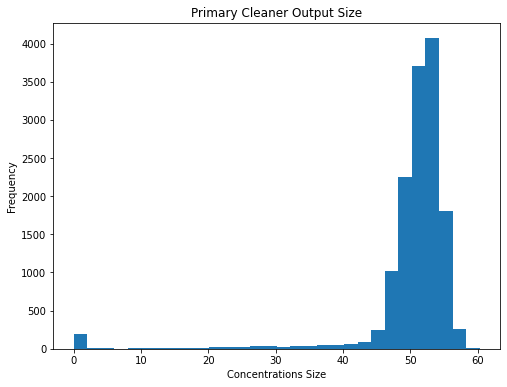

In [61]:
concentrations[2][0].plot(
    kind='hist',
    bins=30,
    title='Primary Cleaner Output Size',
    figsize=[8,6] 
)
plt.xlabel('Concentrations Size')
plt.show()

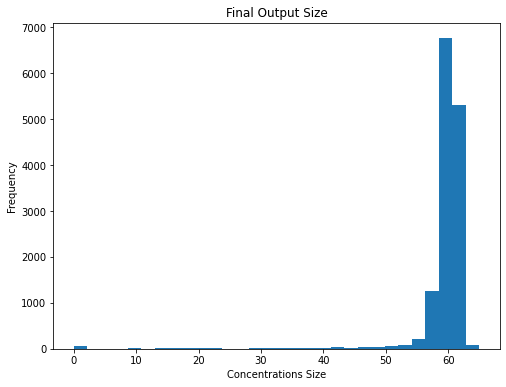

In [62]:
concentrations[3][0].plot(
    kind='hist',
    bins=30,
    title='Final Output Size',
    figsize=[8,6] 
)
plt.xlabel('Concentrations Size')
plt.show()

In each of the stages, we see outliers mostly on the lower end that may affect our models later. So, next we will calculate the upper and lower range to find our cutoffs for outliers.

In [63]:
def outlier_index(vals):
    q1 = np.percentile(vals, 25)
    q3 = np.percentile(vals, 75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    idx = vals[(vals < lower) | (vals > upper)].index
    return idx

In [64]:
oi1 = outlier_index(concentrations[0][0])
oi2 = outlier_index(concentrations[1][0])
oi3 = outlier_index(concentrations[2][0])
oi4 = outlier_index(concentrations[3][0])
#print(oi1)

In [65]:
#gold_train_na_out = gold_train_na.drop(oi1)
#gold_train_na_out.info()

In [66]:
#oi4 = outlier_index(concentrations[3][0])
#print(oi4)
#gold_train_na_out = gold_train_na.drop(oi4)
#gold_train_na_out.info()

In [67]:
out_ind = [oi1, oi2, oi3, oi4]
unq_ind = sorted(list(set(x for l in out_ind for x in l)))       
print(len(unq_ind))

2063


In [68]:
#gold_train_na.info()
gold_train_na_out = gold_train_na.drop(unq_ind)
gold_train_na_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12086 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         12086 non-null  float64
 1   final.output.concentrate_pb                         12086 non-null  float64
 2   final.output.concentrate_sol                        12086 non-null  float64
 3   final.output.concentrate_au                         12086 non-null  float64
 4   final.output.recovery                               12086 non-null  float64
 5   final.output.tail_ag                                12086 non-null  float64
 6   final.output.tail_pb                                12086 non-null  float64
 7   final.output.tail_sol                               12086 non-null  float64
 8   final.output.tail_au                                12086 non-null  float64


<!--14149 before, 13370 after, redone 12086-->

This final dataframe has all the nulls filled in and outliers removed so we can begin modeling.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Outliers were removed successfully!

</div>

## Build the model
* 3.1. Write a function to calculate the final sMAPE value.
* 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

Use these formulas for evaluation metrics:


### sMAPE and Final sMAPE Functions
sMAPE = 1/N * sum( |yi - yih| / (|yi| + |yih|)/2 * 100%

Final sMAPE = sMAPE(rougher) + 75% * sMAPE(final)

In [71]:
# function for sMAPE
def smape(target, predictions):
    sigma = 0
    for i in range(len(predictions)):
        sigma += abs(target[i] - predictions[i]) / (abs(target[i]) + abs(predictions[i])) / 2
    return 100 / len(predictions) * sigma


In [72]:
# function for Final sMAPE
def final_smape(rougher_smape, final_smape):
    total = (0.25*rougher_smape) + (0.75*final_smape)
    return total

<div class="alert alert-success">
<b>Reviewer's comment</b>

The functions for SMAPE calculation are correct

</div>

In [73]:
# Testing sMAPE function
test_target =      [-1, 10, 10, 11, 1, 10, 1, 10, 11, 1, 10, 10, 0, 1]
test_predictions = [1, 10, 10, 10, 1, 11, -1, 10, 10, 1, 10, 11, 10, 1]
smape(test_target, test_predictions)

11.39455782312925

In [74]:
# Testing Final sMAPE function
final_smape(4.111, 1.22222)

1.944415

#### Train Models

In [75]:
gold_train_na_out.reset_index(drop=True, inplace=True)

In [76]:
# Feature and target for each region
features = gold_train_na_out.drop(not_avail, axis=1)
target = gold_train_na_out['final.output.recovery']  
target_rougher = gold_train_na_out['rougher.output.recovery']

In [77]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               12086 non-null  float64
 1   primary_cleaner.input.depressant            12086 non-null  float64
 2   primary_cleaner.input.feed_size             12086 non-null  float64
 3   primary_cleaner.input.xanthate              12086 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      12086 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    12086 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      12086 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    12086 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      12086 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    12086 non-null  float64
 10  primary_cl

In [78]:
target_list = target.tolist()
print(target_list)

[70.54121591421571, 69.26619763433304, 68.11644506978911, 68.34754258837711, 66.92701582047029, 69.46581603505264, 69.30083458490815, 70.23097619382747, 69.68859516475206, 70.27961943433314, 70.97364050816309, 73.58884398687341, 70.84701216208069, 68.7532188879205, 67.83953649349128, 67.23883920809132, 69.06488597702595, 67.20062110817176, 68.60122493719108, 71.45364591496262, 67.46793824991812, 68.95072123397593, 64.88940605580599, 66.33991279062505, 66.73232838822737, 68.39695309161563, 65.06796922528889, 60.336357986667394, 63.82726547694055, 61.18681708587389, 63.23558934515485, 69.81862533224668, 71.27361420869934, 70.67341837906433, 69.19293489585012, 67.10460117967429, 63.410317413620135, 64.27713966167211, 59.6987814149244, 57.34718101527109, 62.01484982307628, 67.95012780325811, 68.43790560588519, 65.93723944445907, 62.51407478689708, 61.81926066580144, 63.76724197954323, 69.64486987921558, 70.47383078090166, 71.44404331735332, 72.8258207439341, 70.09240957817386, 73.116260121

In [79]:
target_rougher

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
12081    89.574376
12082    87.724007
12083    88.890579
12084    89.858126
12085    89.514960
Name: rougher.output.recovery, Length: 12086, dtype: float64

<div class="alert alert-success">
<b>Reviewer's comment</b>

Columns that would cause data leakage were dropped

</div>

In [ ]:
# 75:25 split for train and valid sets
#features_train, features_valid, target_train, target_valid = train_test_split(
#    features, target, test_size=0.25, random_state=12345
#)
#print(features_valid.shape)
#print(target_valid.shape)

In [ ]:
#features_train_rougher, features_valid_rougher, target_train_rougher, target_valid_rougher = train_test_split(
#    features, target_rougher, test_size=0.25, random_state=12345
#)
#print(features_train_rougher.shape)
#print(target_valid_rougher.shape)

In [ ]:
#model = LinearRegression()
#model.fit(features_train, target_train)
#predictions_valid = model.predict(features_valid)
#print(predictions_valid)
#tv_list = target_valid.tolist()
#print(tv_list)
#smape_valid = smape(tv_list, predictions_valid)
#print(smape_valid)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

There's no need to split the data into train and validation in this project, as you're supposed to use cross-validation to compare different models

</div>

<div class="alert alert-info">
  Commented the splits out. 
    
  New cross-validation function below.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

In [69]:
'''
def model_optimizer(model_name, dep=1, estim=10, strg=0):
    best_model = None
    best_est, best_depth, best_smape = 0, 0, 100000
    depth_or_strength = 'Depth'
    estimators = estim+1
    max_dep = dep+1
    if strg != 0:
        max_dep = strg
        depth_or_strength = 'Strength'
    for est in range(10, estimators, 10):
        for depth in range(1, max_dep):
            # if statements for DecTree, RandFor, LogReg
            if model_name == RandomForestRegressor:
                model = model_name(random_state=12345, max_depth=depth, n_estimators=est)
            elif model_name == LinearRegression:
                model = LinearRegression()
            else:
                model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            smape_valid = smape(target_valid, predictions_valid)
            #mae_valid = mean_absolute_error(target_valid, predictions_valid)
            #print('MAE', mae_valid)
            if smape_valid < best_smape:
                best_est = est
                best_depth = depth
                #best_valid_f1 = f1_valid
                #best_roc_auc = roc_auc_valid
                best_smape = smape_valid
                best_model = model
    print('Best', depth_or_strength, ':', best_depth)
    print('Best n-estimators', best_est)
    #print('Best F1 of Validation Set:', best_valid_f1)
    #print('AUC-ROC of Validation Set:', best_roc_auc)
    print('Best sMAPE', best_smape)
    print(best_model)
'''

"\ndef model_optimizer(model_name, dep=1, estim=10, strg=0):\n    best_model = None\n    best_est, best_depth, best_smape = 0, 0, 100000\n    depth_or_strength = 'Depth'\n    estimators = estim+1\n    max_dep = dep+1\n    if strg != 0:\n        max_dep = strg\n        depth_or_strength = 'Strength'\n    for est in range(10, estimators, 10):\n        for depth in range(1, max_dep):\n            # if statements for DecTree, RandFor, LogReg\n            if model_name == RandomForestRegressor:\n                model = model_name(random_state=12345, max_depth=depth, n_estimators=est)\n            elif model_name == LinearRegression:\n                model = LinearRegression()\n            else:\n                model = DecisionTreeRegressor(random_state=12345, max_depth=depth)\n            model.fit(features_train, target_train)\n            predictions_valid = model.predict(features_valid)\n            smape_valid = smape(target_valid, predictions_valid)\n            #mae_valid = mean_abso

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. It is problematic to use global variables like `features_train` which can be easily overwritten in some cell
2. Please use cross-validation using our target metric SMAPE instead of validation set with MAE

</div>

<div class="alert alert-info">
    Commented out previous optimizer function and removed the features_train and like variables.
    Moved optimizer below, still getting negative values
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Well, yeah, if you set `greater_is_better=False`, you're supposed to get negative values :)
    
Why is that? In scikit-learn there is a convention that the 'score' is always maximized (by GridSearchCV and similar objects). Maximizing the negation of an error function is the same thing as minimizing it, thus setting `greater_is_better=False` simply flips the sign

</div>

In [90]:
# Declare make_scorer
smape_scorer = make_scorer(smape)  #, greater_is_better=False)

In [88]:
#model = DecisionTreeRegressor(max_depth=16, random_state=12345)
#model = RandomForestRegressor(random_state=12345, max_depth=16, n_estimators=50)
#model = LinearRegression()


In [91]:
#scores_try = cross_val_score(model, features, target_list, scoring=smape_scorer, cv=5)
#print(scores_try.mean())

In [110]:
def optimizer(model_name, feat, targ, dep=1, estim=10):
    best_model = None
    best_est, best_depth, best_score = 0, 0, 100000
    max_dep = dep+1
    estimators = estim+1
    targ_list = targ.tolist()
    for est in range(10, estimators, 10):
        for depth in range(1, max_dep):
            # if statements for DecTree, RandFor, LogReg
            if model_name == RandomForestRegressor:
                model = model_name(random_state=12345, max_depth=depth, n_estimators=est)
            elif model_name == DecisionTreeRegressor:
                model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
            else:
                model = LinearRegression()
            scores = cross_val_score(model, features, targ_list, scoring=smape_scorer, cv=5)
            #print(scores.mean(), est, depth)
            if scores.mean() < best_score:
                best_est = est
                best_depth = depth
                best_score = scores.mean()
                best_model = model
    print('Best depth', best_depth)
    print('Best n-estimators', best_est)
    print('Best score', best_score)
    print(best_model)

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

All looks good!

</div>

In [115]:
# RandomForestRegressor for final.output.recovery
optimizer(RandomForestRegressor, features, target, 13, 40)  # 4, 40, 2.0603438870787016

Best depth 4
Best n-estimators 40
Best score 2.0603438870787016
RandomForestRegressor(max_depth=4, n_estimators=40, random_state=12345)


In [114]:
# DecisionTreeRegressor for final.output.recovery
optimizer(DecisionTreeRegressor, features, target, dep=16)  # 1, 2.2019506255921546

Best depth 1
Best n-estimators 10
Best score 2.2019506255921546
DecisionTreeRegressor(max_depth=1, random_state=12345)


In [104]:
# LinearRegression for final.output.recovery
optimizer(LinearRegression, features, target)

Best depth 1
Best n-estimators 10
Best score 2.6067851588639357
LinearRegression()


In [113]:
# RandomForestRegressor for rougher.output.recovery
optimizer(RandomForestRegressor, features, target_rougher, 13, 40)  # 5, 40, 1.5723987484400497

Best depth 5
Best n-estimators 40
Best score 1.5723987484400497
RandomForestRegressor(max_depth=5, n_estimators=40, random_state=12345)


In [112]:
# DecisionTreeRegressor for rougher.output.recovery
optimizer(DecisionTreeRegressor, features, target_rougher, dep=16)  # 4, 1.706894280099346

Best depth 4
Best n-estimators 10
Best score 1.706894280099346
DecisionTreeRegressor(max_depth=4, random_state=12345)


In [119]:
# LinearRegression for rougher.output.recovery
optimizer(LinearRegression, features, target_rougher)  

Best depth 1
Best n-estimators 10
Best score 1.7044424474100701
LinearRegression()


The best sMAPE value for final.output.recovery was with the RandomForestRegressor model with a depth of 4 and n_estimators of 40.

The best sMAPE value for rougher.output.recovery was with the RandomForestRegressor model with a depth of 5 and n_estimators of 40.


<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent!

</div>

## Cross-Validation on Test Set

In [ ]:
#def cross_val_final_score(model):
#    scores = cross_val_score(model, features, target, cv=5)
#    final_score = sum(scores) / len(scores)
#    return final_score

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. It is problematic to use global variables like `features` and `target`
    
2. Right now you're using unidentified metric in cross-validation (it's not even clear whether greater values of this metric are better). Please use SMAPE metric instead. You can create a scoring object using [make_scorer](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) and then pass it as the `scoring` parameter to `cross_val_score`

</div>

<div class="alert alert-info">
    Commented out to remove the cross_val_final_score function.
    Updated the cross_val_score to use the smape function in the make_scorer metric.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

In [ ]:
#print('DTR', cross_val_final_score(DecisionTreeRegressor(max_depth=12, random_state=12345)))

In [ ]:
#print('RFR', cross_val_final_score(RandomForestRegressor(random_state=12345, max_depth=13, n_estimators=30)))

In [ ]:
#print('LR', cross_val_final_score(LinearRegression()))

The linear regression model had the highest cross-validation score, so this will be used for the test set.

In [123]:
# Use the test set to match the predictions from the test set
#target_full = gold_full_na.loc[full_test_index]
#print(target_full.info())

In [122]:
# This dataframe is the combination of the test set with the 
# final.output.recovery and rougher.output.recovery columns from the full set
# previously matched by their dates.
gold_test_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

<div class="alert alert-success">
<b>Reviewer's comment</b>

Test set targets were iudentified correctly

</div>

<div class="alert alert-info">
  gold_test_na now has the two target columns matched from the full set.
</div>

In [116]:
# create the features variables for modeling
gold_test_na.reset_index(drop=True, inplace=True)
g_test_features = gold_test_na.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
g_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [133]:
# Final.output.recovery
model_final = RandomForestRegressor(max_depth=4, n_estimators=40, random_state=12345) 
model_final.fit(features, target) 
predictions_test = model_final.predict(g_test_features)
print(predictions_test)

[68.49443483 68.31836369 68.86233425 ... 70.39521693 69.56892279
 69.74004699]


In [134]:
# sMAPE for final.output.recovery
fin_smape = smape(gold_test_na['final.output.recovery'].tolist(), predictions_test)
print(fin_smape)

2.4296010876940004


In [136]:
# rougher.output.recovery
model_rougher = RandomForestRegressor(max_depth=5, n_estimators=40, random_state=12345) 
model_rougher.fit(features, target_rougher) 
predictions_test_rougher = model_rougher.predict(g_test_features)
print(predictions_test_rougher)

[84.80761869 84.80761869 84.80761869 ... 91.87746289 91.87746289
 91.87746289]


In [138]:
# sMAPE for rougher.output.recovery
rougher_smape = smape(gold_test_na['rougher.output.recovery'].tolist(), predictions_test_rougher)
print(rougher_smape)

1.9622657396849652


In [140]:
# Final sMape
final_smape(rougher_smape, fin_smape)

2.3127672506917416

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The final model was evaluated on the test set

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was evaluated on the test set using SMAPE metric

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please add a comparison with a simple baseline, e.g. a constant model always predicting mean or median of train set targets (you can use [DummyRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))

</div>

<div class="alert alert-info">
  Added the dummy regressor below.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome!

</div>

### Dummy Regressor Comparison

In [142]:
# final.output.recovery
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features, target)


dummy_predict = dummy_regr.predict(g_test_features)
#print(len(dummy_predict))
#print(len(gold_test_na['final.output.recovery'].tolist()))
dummy_final_smape = smape(gold_test_na['final.output.recovery'].tolist(), dummy_predict)
print(dummy_final_smape)

2.499572075154443


In [143]:
# rougher.output.recovery
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features, target_rougher)


dummy_predict = dummy_regr.predict(g_test_features)
#print(len(dummy_predict))
#print(len(gold_test_na['rougher.output.recovery'].tolist()))
dummy_rougher_smape = smape(gold_test_na['rougher.output.recovery'].tolist(), dummy_predict)
print(dummy_rougher_smape)

2.256265206122707


In [144]:
# Final sMape
final_smape(dummy_rougher_smape, dummy_final_smape)

2.438745357896509

Both our models were able to produce sMAPE values smaller than the DummyRegressor model as well as with the Final sMAPE value. Albeit, the values calculated in the our model compared to the dummy are relatively close.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

## Conclusion


Using the data sets provided, we found the following:
- There are features in the training and full datasets that don't appear in the test set.
- As we examined the concentrations of gold, silver and lead go through the stages of before flotation, after flotation, after the primary cleaner and after the secondary cleaner, their behaviors are as follows:
    - The concentrations of gold (Au) went up from the beginning to end stages.
    - The concentrations of silver (Ag) went up from before to after flotation, but decreased in the subsequent stages.
    - The concentrations of lead (Pb) increased until the after primary cleaning stage and then stayed about the same between the primary and secondary cleaning stages.


- The Final sMAPE value we got using the RandomForestRegressor model is about 2.313, which was smaller compared to the DummyRegressor value that was more than 0.1 above.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Don't forget to change conclusions if necessary :)

</div>

<div class="alert alert-info">
  Updated the conclusions. Thanks for reviewing! 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

You're welcome! Good job!
    
The project is now accepted. Keep up the good work on the next sprint!

</div>